### Импорт библиотек

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [38]:
print(np.__version__)
print(pd.__version__)

1.26.4
2.2.1


In [39]:
# функция для графического представления матрицы несоответствия
def plot_confusion_matrix(y_true, y_pred, classes, normalize = False, cmap = plt.cm.Blues):
    """
    Функция выводит и строит матрицу несоответствий
    """

    # Вычисление матрицы несоответствий
    cm = metrics.confusion_matrix(y_true, y_pred)
    print('Confusion matrix:\n', cm)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix, without normalization'

    fig, ax = plt.subplots()
    plt.title(title)
    im = ax.imshow(cm, interpolation = 'nearest', cmap = cmap)
    ax.figure.colorbar(im, ax = ax)
    # We want to show all ticks...
    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels = classes, yticklabels = classes,
           ylabel = 'True label',
           xlabel = 'Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation = 45, ha = 'right',
             rotation_mode = 'anchor')

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha = 'center', va = 'center',
                    color = 'white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    plt.show()
    #return cm

### Загрузка данных

In [40]:
data = pd.read_csv(r'C:\Users\mehta\PIPELINE\Pipeline\SpeechRecognitionAndroid\PD classifier\data\Parkinsson disease.csv',
                   sep = ',', index_col = 'name')  
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [41]:
data_h = data.loc[data['status'] == 0]
data_h.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S07_1,197.076,206.896,192.055,0.00289,0.000010,0.00166,0.00168,0.00498,0.01098,0.097,...,0.01689,0.00339,26.775,0,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
phon_R01_S07_2,199.228,209.512,192.091,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,0.089,...,0.01513,0.00167,30.940,0,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501
phon_R01_S07_3,198.383,215.203,193.104,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,0.111,...,0.01919,0.00119,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
phon_R01_S07_4,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,...,0.01407,0.00072,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
phon_R01_S07_5,203.184,211.526,196.160,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,0.085,...,0.01403,0.00065,33.047,0,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539


In [42]:
data = pd.concat([data, data_h])
data.head()
print(data.shape)

(243, 23)


In [43]:
data = pd.concat([data, data_h])
data.head()
print(data.shape)

(291, 23)


### Деление данных на train и test

In [44]:
# создадим датафрейм без метки класса
X = data.drop('status', axis = 1)
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [45]:
# определим метки класса в отдельный вектор
y = data['status']
y.head()

name
phon_R01_S01_1    1
phon_R01_S01_2    1
phon_R01_S01_3    1
phon_R01_S01_4    1
phon_R01_S01_5    1
Name: status, dtype: int64

In [46]:
# процентное соотношение больных и здоровых в датасете
y.value_counts(normalize = True)

status
1    0.505155
0    0.494845
Name: proportion, dtype: float64

In [47]:
# делим данные на train и test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# выведем размерности данных
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (232, 22)
y_train shape:  (232,)
X_test shape:  (59, 22)
y_test shape:  (59,)


### Классификатор на основе логистической регрессии

In [48]:
# создаем объект класса и обучаем модель
lr = LogisticRegression(max_iter = 500)
lr.fit(X_train, y_train)
# делаем предикты для тестовой выборки
y_pred = lr.predict(X_test)
y_pred[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

Confusion matrix:
 [[17 13]
 [ 4 25]]


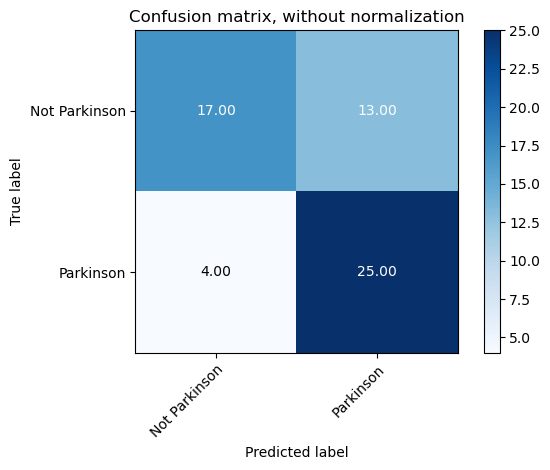

              precision    recall  f1-score   support

           0       0.81      0.57      0.67        30
           1       0.66      0.86      0.75        29

    accuracy                           0.71        59
   macro avg       0.73      0.71      0.71        59
weighted avg       0.73      0.71      0.71        59



In [49]:
# строим матрицу несоответствий
plot_confusion_matrix(y_test, y_pred, classes=['Not Parkinson', 'Parkinson'], normalize = False)
# рассчет метрик классификации
print(metrics.classification_report(y_test, y_pred))

### Классификатор k-NN

In [50]:
# выберем с помощью GridSearchCV наилучший параметр n_neigbours
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(1, 10))}

# создадим объект класса и обучим модель на каждом наборе параметров
grid_search = GridSearchCV(knn, param_grid, scoring='recall', cv=5)
grid_search.fit(X_train, y_train)

print('Наилучшее число соседей: ', grid_search.best_params_)

Наилучшее число соседей:  {'n_neighbors': 1}


In [51]:
# создаем объект класса и обучаем модель
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
# делаем предикты для тестовой выборки
y_pred = knn.predict(X_test)
y_pred[0:10]

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

Confusion matrix:
 [[21  9]
 [ 8 21]]


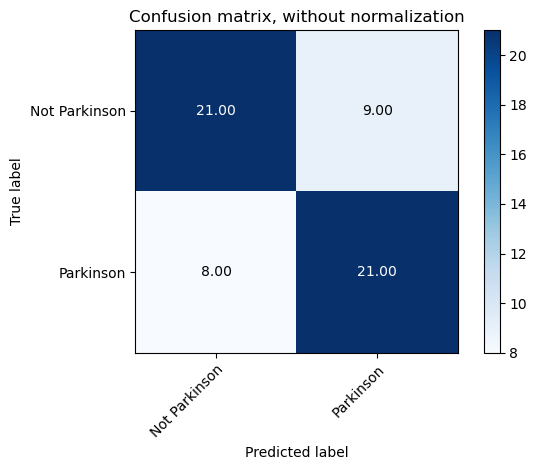

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        30
           1       0.70      0.72      0.71        29

    accuracy                           0.71        59
   macro avg       0.71      0.71      0.71        59
weighted avg       0.71      0.71      0.71        59



In [52]:
# строим матрицу несоответствий
plot_confusion_matrix(y_test, y_pred, classes=['Not Parkinson', 'Parkinson'], normalize = False)
# рассчет метрик классификации
print(metrics.classification_report(y_test, y_pred))

### Классификатор на основе SVM

In [53]:
# выберем с помощью GridSearchCV наилучшие параметры классификатора
svm = SVC()

param_grid = {
    'C': list(np.arange(0.1, 1, 0.1)), # параметр регуляризации
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # ядро классификатора
    'degree': list(range(2, 5)), # степень для полиноминального ядра
    #'gamma': [0.1, 1, 10], # коэффициент ядра
}

# создадим объект класса и обучим модель на каждом наборе параметров
grid_search = GridSearchCV(svm, param_grid, scoring='recall', cv=2)
grid_search.fit(X_train, y_train)

print('Лучшие параметры: ', grid_search.best_params_)

Лучшие параметры:  {'C': 0.1, 'degree': 2, 'kernel': 'sigmoid'}


In [54]:
# создаем объект класса и обучаем модель C = 0.1
svm = SVC()
svm.fit(X_train, y_train)
# делаем предикты для тестовой выборки
y_pred = svm.predict(X_test)
y_pred[0:10]

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

Confusion matrix:
 [[15 15]
 [ 6 23]]


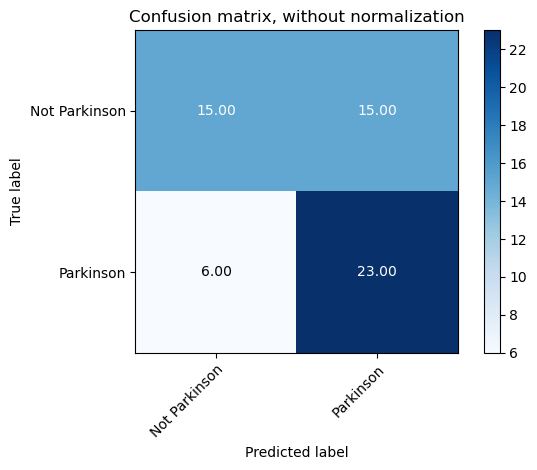

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        30
           1       0.61      0.79      0.69        29

    accuracy                           0.64        59
   macro avg       0.66      0.65      0.64        59
weighted avg       0.66      0.64      0.64        59



In [55]:
# строим матрицу несоответствий
plot_confusion_matrix(y_test, y_pred, classes=['Not Parkinson', 'Parkinson'], normalize = False)
# рассчет метрик классификации
print(metrics.classification_report(y_test, y_pred))

### Классификатор Random Forest

In [56]:
# выберем с помощью GridSearchCV наилучшие параметры классификатора
rfc = RandomForestClassifier(random_state=17)

param_grid = {
    'max_depth': list(range(2,10)),
    'max_features': list(range(1,8)),
    'min_samples_leaf': list(range (1,11)),
    'n_estimators': list(range(2,10))
            }

# создадим объект класса и обучим модель на каждом наборе параметров
grid_search = GridSearchCV(rfc, param_grid, scoring='recall', cv=5)
grid_search.fit(X_train, y_train)

print('Лучшие параметры: ', grid_search.best_params_)

KeyboardInterrupt: 

In [57]:
# создаем объект класса и обучаем модель n_estimators=1(2), max_depth=2, max_features=3
rfc = RandomForestClassifier(n_estimators=5, max_depth=4, min_samples_leaf=2, max_features=1, random_state=17)
rfc.fit(X_train, y_train)
# делаем предикты для тестовой выборки
y_pred = rfc.predict(X_test)
y_pred[0:10]

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

Confusion matrix:
 [[30  0]
 [ 3 26]]


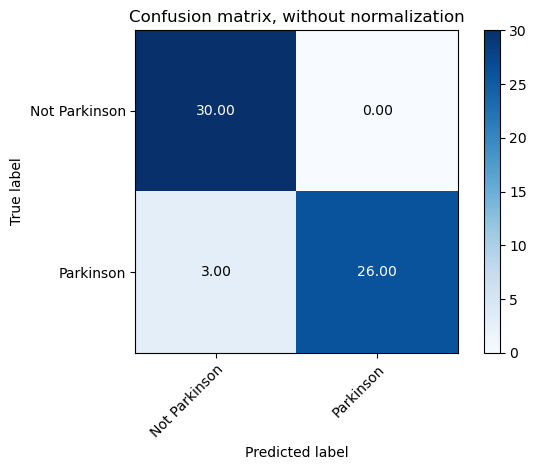

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        30
           1       1.00      0.90      0.95        29

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59



In [58]:
# строим матрицу несоответствий
plot_confusion_matrix(y_test, y_pred, classes=['Not Parkinson', 'Parkinson'], normalize = False)
# рассчет метрик классификации
print(metrics.classification_report(y_test, y_pred))

### Классификатор Дерево решений

In [ ]:
# выберем с помощью GridSearchCV наилучшие параметры классификатора
tdc = tree.DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': range (2,11),
    'min_samples_leaf': range (1,11),
    'max_features': range (1,9)
             }

# создадим объект класса и обучим модель на каждом наборе параметров
grid_search = GridSearchCV(tdc, param_grid, scoring='recall', cv=5)
grid_search.fit(X_train, y_train)

print('Лучшие параметры: ', grid_search.best_params_)

Лучшие параметры:  {'max_depth': 2, 'max_features': 4, 'min_samples_leaf': 3}


In [59]:
# создаем объект класса и обучаем модель
tdc = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=3, random_state=42)
tdc.fit(X_train, y_train)
# делаем предикты для тестовой выборки
y_pred = tdc.predict(X_test)
y_pred[0:10]

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Confusion matrix:
 [[15 15]
 [ 1 28]]


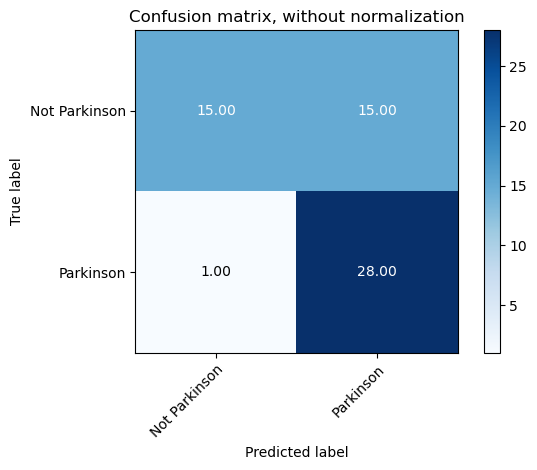

              precision    recall  f1-score   support

           0       0.94      0.50      0.65        30
           1       0.65      0.97      0.78        29

    accuracy                           0.73        59
   macro avg       0.79      0.73      0.71        59
weighted avg       0.80      0.73      0.71        59



In [60]:
# строим матрицу несоответствий
plot_confusion_matrix(y_test, y_pred, classes=['Not Parkinson', 'Parkinson'], normalize = False)
# рассчет метрик классификации
print(metrics.classification_report(y_test, y_pred))

### Классификатор на основе LDA

In [61]:
# создаем объект класса и обучаем модель
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_train, y_train)
# делаем предикты для тестовой выборки
y_pred = lda.predict(X_test)
y_pred[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

Confusion matrix:
 [[18 12]
 [ 4 25]]


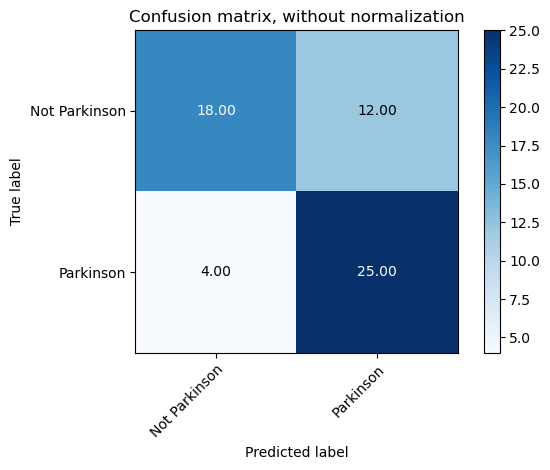

              precision    recall  f1-score   support

           0       0.82      0.60      0.69        30
           1       0.68      0.86      0.76        29

    accuracy                           0.73        59
   macro avg       0.75      0.73      0.72        59
weighted avg       0.75      0.73      0.72        59



In [62]:
# строим матрицу несоответствий
plot_confusion_matrix(y_test, y_pred, classes=['Not Parkinson', 'Parkinson'], normalize = False)
# рассчет метрик классификации
print(metrics.classification_report(y_test, y_pred))

### Байесовский классификатор

In [63]:
# создаем объект класса и обучаем модель
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# делаем предикты для тестовой выборки
y_pred = gnb.predict(X_test)
y_pred[0:10]

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

Confusion matrix:
 [[30  0]
 [10 19]]


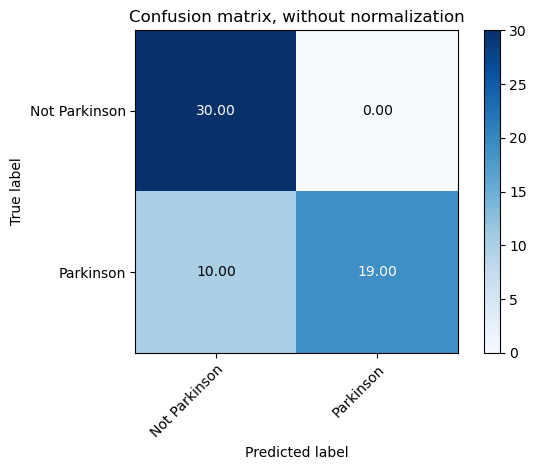

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        30
           1       1.00      0.66      0.79        29

    accuracy                           0.83        59
   macro avg       0.88      0.83      0.82        59
weighted avg       0.87      0.83      0.82        59



In [64]:
# строим матрицу несоответствий
plot_confusion_matrix(y_test, y_pred, classes=['Not Parkinson', 'Parkinson'], normalize = False)
# рассчет метрик классификации
print(metrics.classification_report(y_test, y_pred))